# Business Understanding

As Data Science and Machine Learning have become a hot topic, I was interested in learning more about developers and the industry. For this purpose, I have analyzed the Stack Overflow 2017 Survey Data. The key questions I would like to answer are:

I have used the Stack Overflow 2017 Survey data to make a prediction model. The model is at the end of this notebook.

# Data Understanding

The Stack Overflow 2017 Survey data contains information collected from more than 200 countries. Almost 64000 participants took part in the survey. The survey contained 150 questions. This notebook attempted to use the survey questions to provide information about the gender disparity in the industry, correlation between salary and job satisfation, and tells which country produces more developers.
The data came in two files survey_results_public.csv and survey_results_schema.csv 

# Data Preparation (cleaning)

During the data preprocessing and processing stage, I have handled the categorical and missing values in the data. Installing the necessary libraries. 
I have used numpy and pandas to wrangle the data amd matplotlib to make plots for analysis.

In [6]:
import numpy as np
import pandas as pd
import collections
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('survey_results_public.csv')

In [8]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Assess Data

The data contains several features which do not help answer our analysis questions. I have decided to ignore the unnecesssary columns and missing values. Rows that contain missing values will be dropped or ignored during the data preprocessing stage. 

In [9]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [10]:
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [11]:
df.shape

(51392, 154)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


array([[<AxesSubplot:title={'center':'Respondent'}>,
        <AxesSubplot:title={'center':'CareerSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'HoursPerWeek'}>,
        <AxesSubplot:title={'center':'StackOverflowSatisfaction'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'ExpectedSalary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

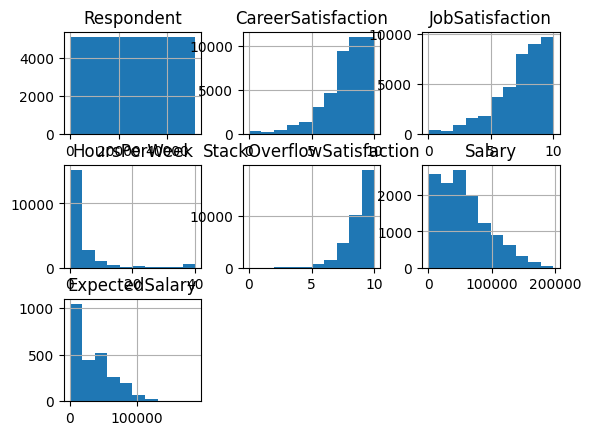

In [13]:
#Show histogram of all the numerical variables
df.hist()

<AxesSubplot:>

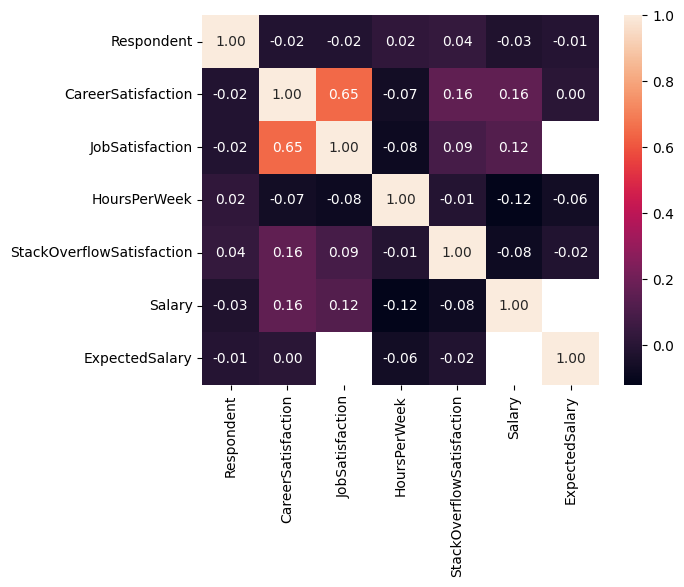

In [14]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

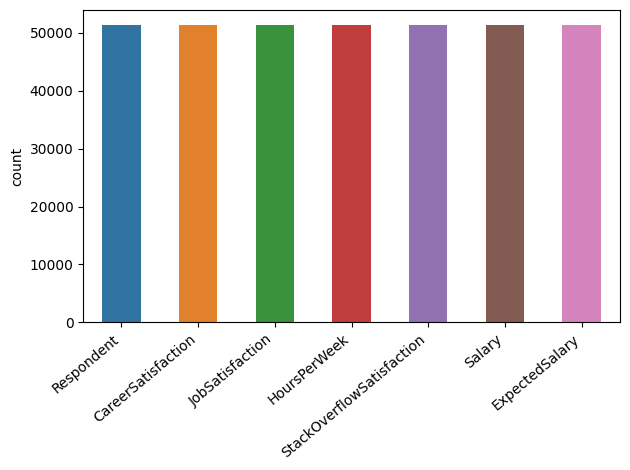

In [15]:
ax = sns.countplot(df, width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [16]:
#Show unique enteries in each column
df.nunique()

Respondent              51392
Professional                5
ProgramHobby                4
Country                   201
University                  4
                        ...  
QuestionsInteresting        5
QuestionsConfusing          5
InterestedAnswers           5
Salary                   3049
ExpectedSalary            685
Length: 154, dtype: int64

# Quality Problem

The data has a quality problems. There are missing values and unique enteries.  

In [17]:
no_nulls=set(df.columns[df.isnull().mean()==0]) #Provide a set of columns with no missing values
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [34]:
df['Salary'].isnull().sum()

38501

As you can notice, the Salary column contains a lot of missing values. We can either impute these values or drop these values. I have decided to drop the missing values. 

In [60]:
num_vars = df['Salary']
df_salary_dropna = num_vars.dropna()

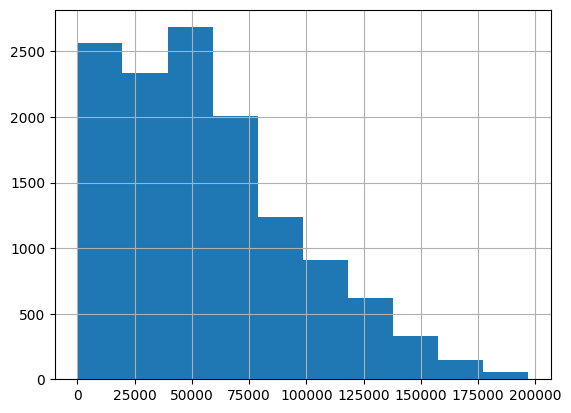

In [64]:
df['Salary'].hist()
plt.show()

In [72]:
df['JobSatisfaction'].isnull().sum()

11016

The JobSatisfaction column contains missing values. The easiest way is to drop these values. It will not affect the quality of our analysis.

In [73]:
df['JobSatisfaction'].dropna(axis=0)

2         9.0
3         3.0
4         8.0
6         6.0
7         7.0
         ... 
51386     4.0
51387     3.0
51389    10.0
51390     7.0
51391     8.0
Name: JobSatisfaction, Length: 40376, dtype: float64

<AxesSubplot:>

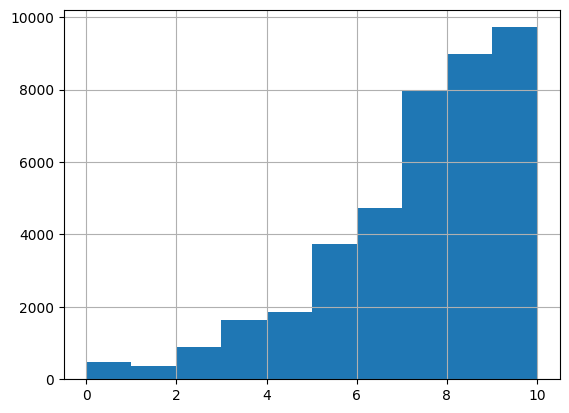

In [77]:
df['JobSatisfaction'].hist()

In [35]:
df['Gender'].isnull().sum()

16345

As you can see, we have 16345 missing values in the Gender column. We can either ignore these values, drop these values, or we can just impute these values. I have decided to drop the missing values. 

In [40]:
df.shape

(51392, 154)

In [36]:
num_var = df['Gender']
df_dropna = num_var.dropna(axis=0) 

In [42]:
df['Gender'].value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

# Q1: Which gender is dominant in the industry?

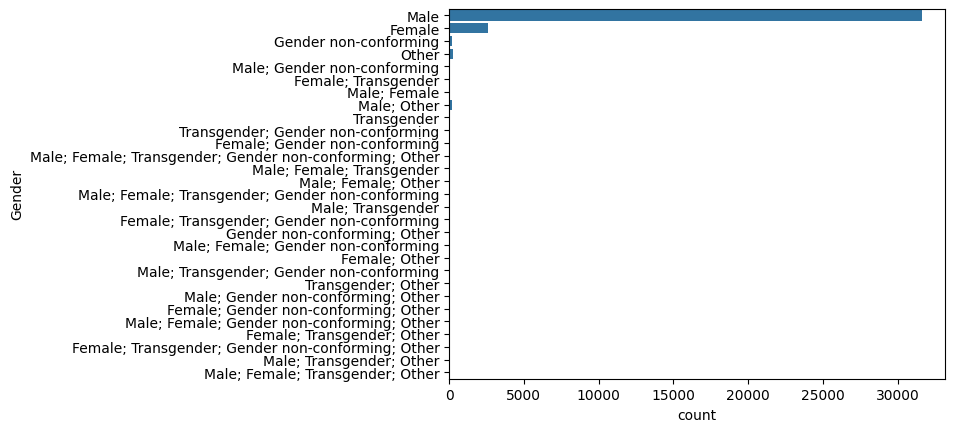

In [43]:
sns.countplot(data = df, y='Gender', color=sns.color_palette()[0]);

In [44]:
df["Gender"].describe()

count     35047
unique       29
top        Male
freq      31589
Name: Gender, dtype: object

As you can see, majority of the developers identify as "Male."

In [45]:
df['Gender'].nunique()

29

In [46]:
df.groupby('Gender').mean()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Gender,,,,,,,
Female,26901.968462,7.185069,6.936620,4.191885,8.332943,58083.924534,29830.759637
Female; Gender non-conforming,28761.103448,7.481481,7.250000,1.666667,7.862069,69519.757125,111827.956989
Female; Gender non-conforming; Other,34241.000000,NaN,NaN,NaN,5.000000,NaN,NaN
Female; Other,16226.000000,NaN,NaN,NaN,6.000000,NaN,90000.000000
Female; Transgender,25537.625000,6.545455,6.735294,2.760000,7.803571,78791.988363,63333.333333
Female; Transgender; Gender non-conforming,28811.250000,7.714286,7.500000,1.500000,7.625000,90750.000000,NaN
Female; Transgender; Gender non-conforming; Other,38101.000000,8.000000,7.000000,NaN,10.000000,NaN,NaN
Female; Transgender; Other,37771.000000,7.000000,8.000000,NaN,8.000000,126000.000000,NaN
Gender non-conforming,28241.350000,6.628319,6.411765,3.860759,7.987179,63672.172798,35355.432776


In contrast, the number of possible combinations (i.e. unique entries) is lower when only one or a certain number of options can be selected.

# Q2: Which country produces more developers?

In [22]:
df['Country'].head()

0     United States
1    United Kingdom
2    United Kingdom
3     United States
4       Switzerland
Name: Country, dtype: object

In [70]:
df['Country'].isnull().sum()

0

There are no missing values in the Country column.

In [23]:
df['Country'].value_counts()

United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64

In [24]:
df['Country'].describe()

count             51392
unique              201
top       United States
freq              11455
Name: Country, dtype: object

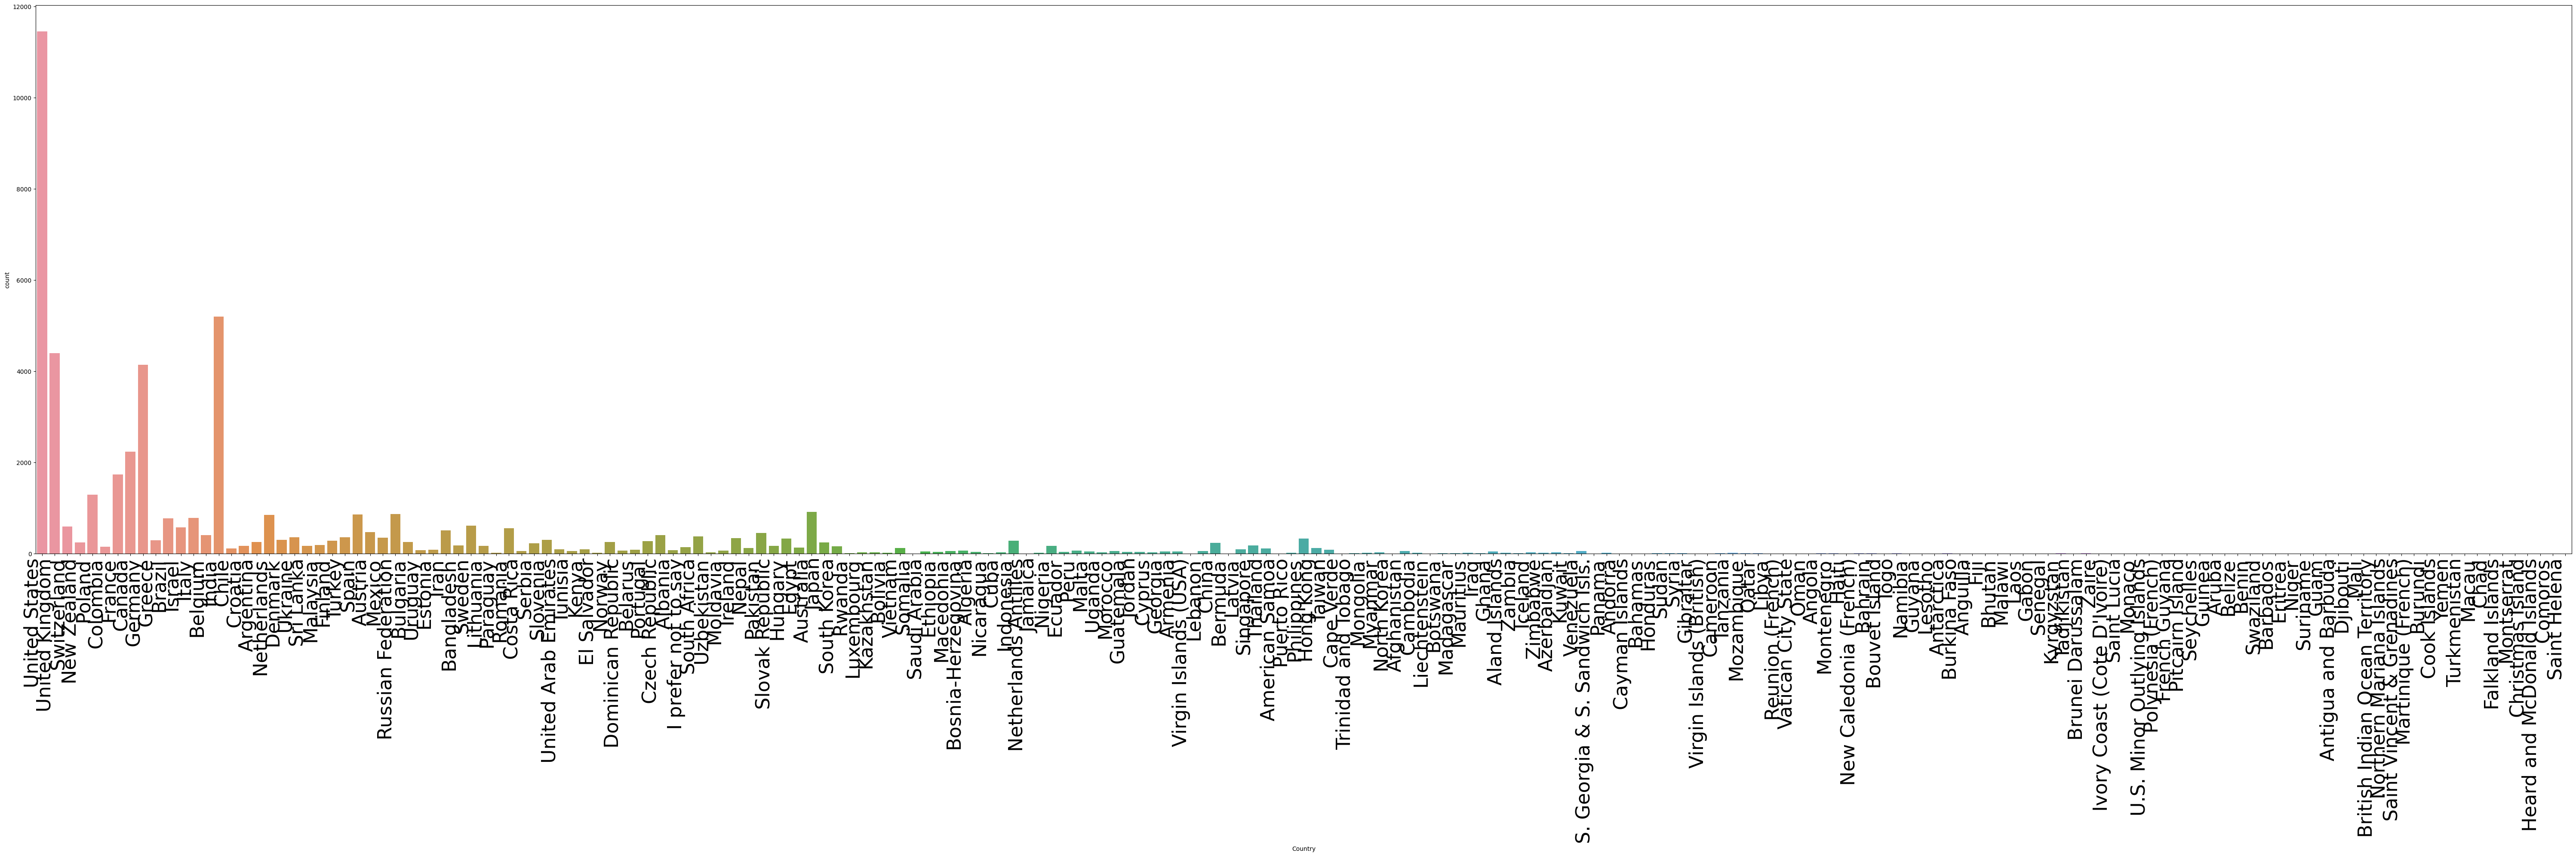

In [25]:
plt.figure(figsize=(60,20))
ax = sns.countplot(x='Country', data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=32)
plt.tight_layout()
plt.show()

As you can see, majority of the participants belonged to the United States, United Kingdom, China, and Germany.

C:\Users\ADMIN\anaconda3\envs\env-IDS2020\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


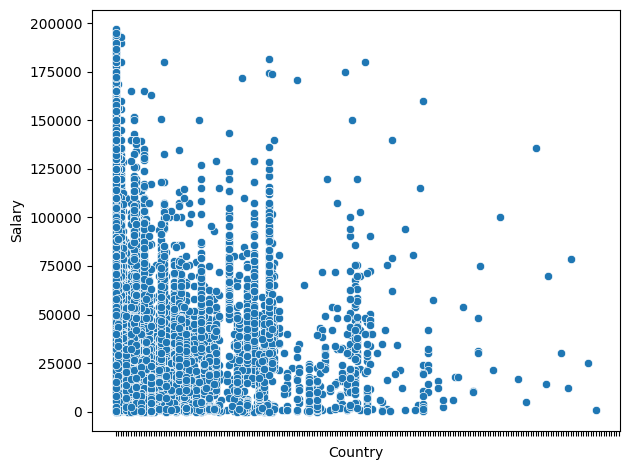

In [26]:
ax = sns.scatterplot(data=df, x='Country', y='Salary', markers=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=32)
plt.tight_layout()
plt.show()

We can safely assume that developers in the United States get higher salaries than most of the developers in other countries.  

# Q3. Are salary and job satisfaction correlated?

<AxesSubplot:>

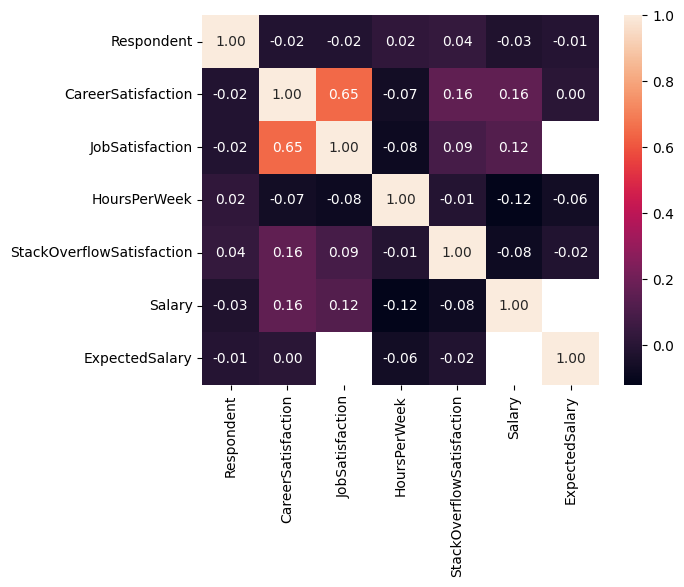

In [27]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

We can see that none of the variables we are interested in are highly correlated with salary. We can say that a mjority of the participants either refused to answer the salary question or they did not receive a salary question. 

However, the above heatmap clearly indicates the correlation between salary and job satisfaction.

# Modelling

I have decided to use sklearn package to train a model predicting salaries of developers with respect to career satisfaction,
job satisfaction, and Hours per week.

In [71]:
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) 

        
y_test_preds = lm_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.030994664959115625
1546382888.0495825


C:\Users\ADMIN\anaconda3\envs\env-IDS2020\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


The model worked because we dropped the missing values. Notice the mean squared error value.

In [80]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.shape

(1602, 3)

Plotting the difference between predictions and actual values

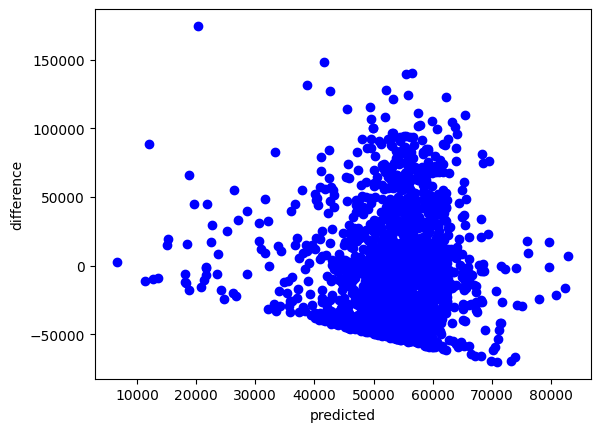

In [81]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');